# Comparative Analysis: Stochastic Gradient Descent and Adam Optimizer for Neural Networks Training

## Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

### Use GPU to speed up the tasks

In [2]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
if gpus: 
  tf.config.experimental.set_memory_growth(gpus[0], True)

## Import Utilities

In [2]:
import utils as ut

## Hyperparameters

In [7]:
batch_sizes = [32, 64, 128]
learning_rates = [0.1, 0.01, 0.001]

### Sample hyperparameter

In [6]:
BATCH_SIZE = 32
LEARNING_RATE = 0.001

## Binary Classification

In [7]:
titanic, info = tfds.load(
    'titanic', 
    split = 'train', 
    as_supervised = True, 
    with_info = True
)
len(titanic), info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/titanic/4.0.0.incomplete4BQLZM/titanic-train.tfrecord*...:   0%|          …

Dataset titanic downloaded and prepared to /root/tensorflow_datasets/titanic/4.0.0. Subsequent calls will reuse this data.


(1309,
 tfds.core.DatasetInfo(
     name='titanic',
     full_name='titanic/4.0.0',
     description="""
     Dataset describing the survival status of individual passengers on the Titanic.
     Missing values in the original dataset are represented using ?. Float and int
     missing values are replaced with -1, string missing values are replaced with
     'Unknown'.
     """,
     homepage='https://www.openml.org/d/40945',
     data_path='/root/tensorflow_datasets/titanic/4.0.0',
     file_format=tfrecord,
     download_size=114.98 KiB,
     dataset_size=382.58 KiB,
     features=FeaturesDict({
         'age': float32,
         'boat': string,
         'body': int32,
         'cabin': string,
         'embarked': ClassLabel(shape=(), dtype=int64, num_classes=4),
         'fare': float32,
         'home.dest': string,
         'name': string,
         'parch': int32,
         'pclass': ClassLabel(shape=(), dtype=int64, num_classes=3),
         'sex': ClassLabel(shape=(), dtype=int64, 

In [8]:
titanic_train, titanic_test, titanic_val = ut.partition(titanic)

AUTOTUNE = tf.data.experimental.AUTOTUNE

def handle_data(data, label):
    age = data['age']
    sex = data['sex']
    pclass = data['pclass']
    fare = data['fare']
    handled_data = tf.stack([
        tf.cast(age, tf.int64),
        sex,
        pclass,
        tf.cast(fare, tf.int64)
    ])
    return handled_data, label


def process_titanic(titanic):
    titanic = titanic.map(handle_data, num_parallel_calls=AUTOTUNE)
    titanic = titanic.shuffle(len(titanic))
    titanic = titanic.batch(BATCH_SIZE)
    titanic = titanic.prefetch(AUTOTUNE)
    return titanic


titanic_train = process_titanic(titanic_train)
titanic_test = process_titanic(titanic_test)
titanic_val = process_titanic(titanic_val)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((4, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [10]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = LEARNING_RATE),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

sgd_history = model.fit(
    titanic_train, 
    epochs = 10, 
    batch_size = BATCH_SIZE, 
    validation_data = titanic_val, 
    verbose = 2, 
)

sgd_results = model.evaluate(titanic_test, verbose = 0)
sgd_results

Epoch 1/10
33/33 - 8s - loss: 0.7695 - accuracy: 0.6170 - val_loss: 0.6456 - val_accuracy: 0.6154 - 8s/epoch - 244ms/step
Epoch 2/10
33/33 - 1s - loss: 0.6413 - accuracy: 0.6724 - val_loss: 0.6399 - val_accuracy: 0.6231 - 645ms/epoch - 20ms/step
Epoch 3/10
33/33 - 0s - loss: 0.6506 - accuracy: 0.6351 - val_loss: 0.6219 - val_accuracy: 0.5692 - 474ms/epoch - 14ms/step
Epoch 4/10
33/33 - 1s - loss: 0.6320 - accuracy: 0.6724 - val_loss: 0.6447 - val_accuracy: 0.6077 - 630ms/epoch - 19ms/step
Epoch 5/10
33/33 - 1s - loss: 0.6354 - accuracy: 0.6437 - val_loss: 0.5792 - val_accuracy: 0.6692 - 720ms/epoch - 22ms/step
Epoch 6/10
33/33 - 1s - loss: 0.6230 - accuracy: 0.6619 - val_loss: 0.5885 - val_accuracy: 0.6231 - 507ms/epoch - 15ms/step
Epoch 7/10
33/33 - 1s - loss: 0.6189 - accuracy: 0.6609 - val_loss: 0.6196 - val_accuracy: 0.6923 - 606ms/epoch - 18ms/step
Epoch 8/10
33/33 - 1s - loss: 0.6090 - accuracy: 0.6657 - val_loss: 0.6237 - val_accuracy: 0.6077 - 502ms/epoch - 15ms/step
Epoch 9/10

[0.6188560128211975, 0.6212121248245239]

In [11]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

adam_history = model.fit(
    titanic_train, 
    epochs = 10, 
    batch_size = BATCH_SIZE, 
    validation_data = titanic_val, 
    verbose = 2, 
)

adam_results = model.evaluate(titanic_test, verbose = 0)
adam_results

Epoch 1/10
33/33 - 2s - loss: 0.6366 - accuracy: 0.6600 - val_loss: 0.6378 - val_accuracy: 0.5846 - 2s/epoch - 61ms/step
Epoch 2/10
33/33 - 0s - loss: 0.6262 - accuracy: 0.6543 - val_loss: 0.5495 - val_accuracy: 0.6692 - 206ms/epoch - 6ms/step
Epoch 3/10
33/33 - 0s - loss: 0.5892 - accuracy: 0.6466 - val_loss: 0.6333 - val_accuracy: 0.7231 - 210ms/epoch - 6ms/step
Epoch 4/10
33/33 - 0s - loss: 0.6057 - accuracy: 0.6571 - val_loss: 0.5515 - val_accuracy: 0.6846 - 232ms/epoch - 7ms/step
Epoch 5/10
33/33 - 0s - loss: 0.5725 - accuracy: 0.6695 - val_loss: 0.5263 - val_accuracy: 0.7462 - 215ms/epoch - 7ms/step
Epoch 6/10
33/33 - 0s - loss: 0.5432 - accuracy: 0.7011 - val_loss: 0.5859 - val_accuracy: 0.6538 - 199ms/epoch - 6ms/step
Epoch 7/10
33/33 - 0s - loss: 0.5500 - accuracy: 0.6915 - val_loss: 0.5378 - val_accuracy: 0.6538 - 201ms/epoch - 6ms/step
Epoch 8/10
33/33 - 0s - loss: 0.5433 - accuracy: 0.6982 - val_loss: 0.5821 - val_accuracy: 0.7615 - 224ms/epoch - 7ms/step
Epoch 9/10
33/33 -

[0.5200605392456055, 0.6818181872367859]

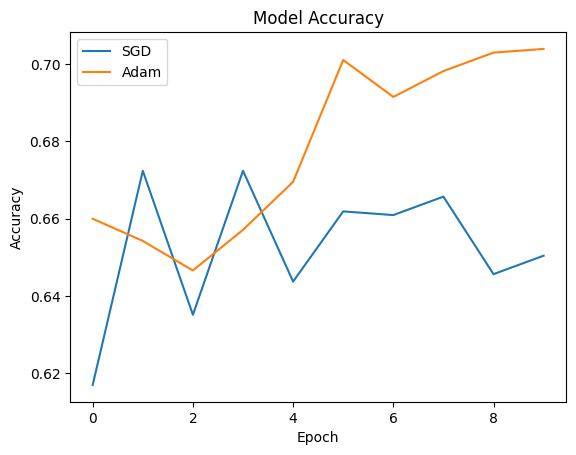

In [12]:
ut.plot(sgd_history, adam_history, key = 'accuracy')

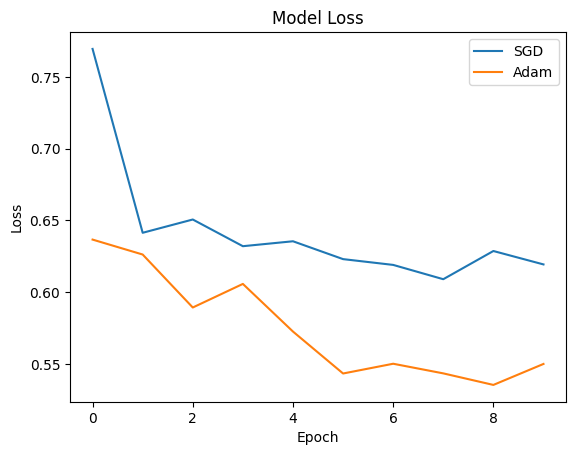

In [13]:
ut.plot(sgd_history, adam_history, key = 'loss')

## Multiclass Image Classification

In [14]:
mnist, info = tfds.load(
    'mnist', 
    split = 'train + test', 
    as_supervised = True, 
    with_info = True
)
len(mnist), info

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


(70000,
 tfds.core.DatasetInfo(
     name='mnist',
     full_name='mnist/3.0.1',
     description="""
     The MNIST database of handwritten digits.
     """,
     homepage='http://yann.lecun.com/exdb/mnist/',
     data_path='/root/tensorflow_datasets/mnist/3.0.1.incomplete3JJB74',
     file_format=tfrecord,
     download_size=11.06 MiB,
     dataset_size=21.00 MiB,
     features=FeaturesDict({
         'image': Image(shape=(28, 28, 1), dtype=uint8),
         'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
     }),
     supervised_keys=('image', 'label'),
     disable_shuffling=False,
     splits={
         'test': <SplitInfo num_examples=10000, num_shards=1>,
         'train': <SplitInfo num_examples=60000, num_shards=1>,
     },
     citation="""@article{lecun2010mnist,
       title={MNIST handwritten digit database},
       author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
       journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
       volu

In [15]:
mnist_train, mnist_test, mnist_val = ut.partition(mnist)

AUTOTUNE = tf.data.experimental.AUTOTUNE

def normalize_image(image, label):
  return tf.cast(image, tf.float32) / 255, label

def process_mnist(mnist):
  mnist = mnist.map(normalize_image, num_parallel_calls = AUTOTUNE)
  mnist = mnist.shuffle(len(mnist))
  mnist = mnist.batch(BATCH_SIZE)
  mnist = mnist.prefetch(AUTOTUNE)
  return mnist

mnist_train = process_mnist(mnist_train)
mnist_test = process_mnist(mnist_test)
mnist_val = process_mnist(mnist_val)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.Input((28, 28, 1)),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = LEARNING_RATE),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

sgd_history = model.fit(
    mnist_train, 
    epochs = 10, 
    batch_size = BATCH_SIZE, 
    validation_data = mnist_val, 
    verbose = 2, 
)

sgd_results = model.evaluate(mnist_test, verbose = 0)
sgd_results

Epoch 1/10
1750/1750 - 20s - loss: 2.0708 - accuracy: 0.4033 - val_loss: 1.5613 - val_accuracy: 0.6321 - 20s/epoch - 11ms/step
Epoch 2/10
1750/1750 - 13s - loss: 0.9059 - accuracy: 0.7658 - val_loss: 0.5444 - val_accuracy: 0.8447 - 13s/epoch - 8ms/step
Epoch 3/10
1750/1750 - 13s - loss: 0.4387 - accuracy: 0.8766 - val_loss: 0.3875 - val_accuracy: 0.8857 - 13s/epoch - 7ms/step
Epoch 4/10
1750/1750 - 14s - loss: 0.3433 - accuracy: 0.8988 - val_loss: 0.3267 - val_accuracy: 0.9033 - 14s/epoch - 8ms/step
Epoch 5/10
1750/1750 - 16s - loss: 0.2970 - accuracy: 0.9125 - val_loss: 0.2933 - val_accuracy: 0.9124 - 16s/epoch - 9ms/step
Epoch 6/10
1750/1750 - 14s - loss: 0.2654 - accuracy: 0.9212 - val_loss: 0.2672 - val_accuracy: 0.9223 - 14s/epoch - 8ms/step
Epoch 7/10
1750/1750 - 14s - loss: 0.2411 - accuracy: 0.9289 - val_loss: 0.2547 - val_accuracy: 0.9219 - 14s/epoch - 8ms/step
Epoch 8/10
1750/1750 - 13s - loss: 0.2207 - accuracy: 0.9345 - val_loss: 0.2184 - val_accuracy: 0.9349 - 13s/epoch - 

[0.19493338465690613, 0.9447143077850342]

In [18]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

adam_history = model.fit(
    mnist_train, 
    epochs = 10, 
    batch_size = BATCH_SIZE, 
    validation_data = mnist_val, 
    verbose = 2, 
)

adam_results = model.evaluate(mnist_test, verbose = 0)
adam_results

Epoch 1/10
1750/1750 - 10s - loss: 0.1092 - accuracy: 0.9666 - val_loss: 0.0641 - val_accuracy: 0.9800 - 10s/epoch - 6ms/step
Epoch 2/10
1750/1750 - 9s - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0482 - val_accuracy: 0.9846 - 9s/epoch - 5ms/step
Epoch 3/10
1750/1750 - 8s - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0395 - val_accuracy: 0.9869 - 8s/epoch - 5ms/step
Epoch 4/10
1750/1750 - 7s - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0283 - val_accuracy: 0.9907 - 7s/epoch - 4ms/step
Epoch 5/10
1750/1750 - 8s - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0400 - val_accuracy: 0.9879 - 8s/epoch - 4ms/step
Epoch 6/10
1750/1750 - 8s - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0408 - val_accuracy: 0.9891 - 8s/epoch - 4ms/step
Epoch 7/10
1750/1750 - 8s - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0410 - val_accuracy: 0.9894 - 8s/epoch - 5ms/step
Epoch 8/10
1750/1750 - 9s - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0394 - val_accuracy: 0.9903 - 9s/epoch - 5ms/step
Epoch 

[0.046210192143917084, 0.9894285798072815]

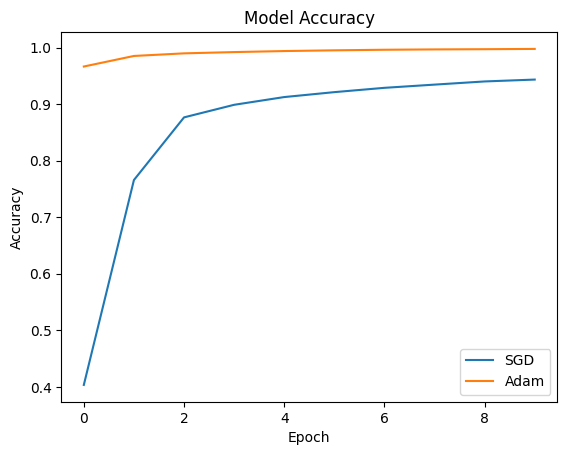

In [19]:
ut.plot(sgd_history, adam_history, key = 'accuracy')

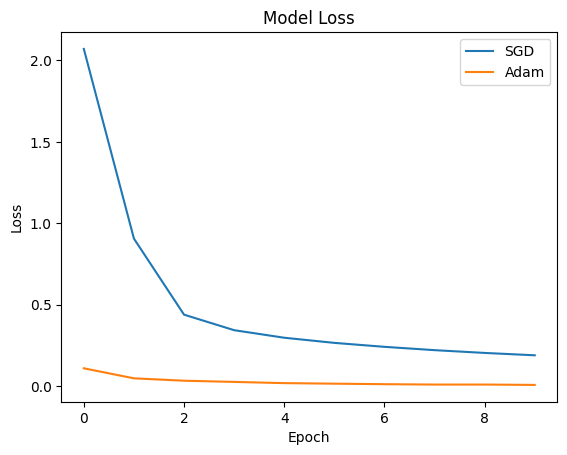

In [20]:
ut.plot(sgd_history, adam_history, key = 'loss')

## Sentimental Analysis

In [5]:
imdb, info = tfds.load(
    'imdb_reviews', 
    split = 'train + test', 
    as_supervised = True, 
    with_info = True
)
len(imdb), info

(50000,
 tfds.core.DatasetInfo(
     name='imdb_reviews',
     full_name='imdb_reviews/plain_text/1.0.0',
     description="""
     Large Movie Review Dataset. This is a dataset for binary sentiment
     classification containing substantially more data than previous benchmark
     datasets. We provide a set of 25,000 highly polar movie reviews for training,
     and 25,000 for testing. There is additional unlabeled data for use as well.
     """,
     config_description="""
     Plain text
     """,
     homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
     data_path='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
     file_format=tfrecord,
     download_size=80.23 MiB,
     dataset_size=129.83 MiB,
     features=FeaturesDict({
         'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
         'text': Text(shape=(), dtype=string),
     }),
     supervised_keys=('text', 'label'),
     disable_shuffling=False,
     splits={
         'test': <SplitInfo num_e

In [22]:
imdb_train, imdb_test, imdb_val = ut.partition(imdb)

AUTOTUNE = tf.data.experimental.AUTOTUNE

encoder = tf.keras.layers.TextVectorization()
encoder.adapt(imdb_train.map(lambda text, _: text))

def encode(text, label):
  return encoder(text), label

def process_imdb(imdb):
  imdb = imdb.map(encode, num_parallel_calls = AUTOTUNE)
  imdb = imdb.shuffle(len(imdb))
  imdb = imdb.padded_batch(BATCH_SIZE, padded_shapes = ([None], ()))
  imdb = imdb.prefetch(AUTOTUNE)
  return imdb

imdb_train = process_imdb(imdb_train)
imdb_test = process_imdb(imdb_test)
imdb_val = process_imdb(imdb_val)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero = True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(1)
])

In [24]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = LEARNING_RATE, clipnorm = 1),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

sgd_history = model.fit(
    imdb_train, 
    epochs = 10, 
    batch_size = BATCH_SIZE, 
    validation_data = imdb_val, 
    verbose = 2, 
)

sgd_results = model.evaluate(imdb_test, verbose = 0)
sgd_results

Epoch 1/10
1250/1250 - 143s - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.4916 - 143s/epoch - 114ms/step
Epoch 2/10
1250/1250 - 88s - loss: 0.6931 - accuracy: 0.5006 - val_loss: 0.6930 - val_accuracy: 0.4944 - 88s/epoch - 71ms/step
Epoch 3/10
1250/1250 - 76s - loss: 0.6930 - accuracy: 0.5008 - val_loss: 0.6929 - val_accuracy: 0.5042 - 76s/epoch - 61ms/step
Epoch 4/10
1250/1250 - 79s - loss: 0.6930 - accuracy: 0.5005 - val_loss: 0.6929 - val_accuracy: 0.4922 - 79s/epoch - 63ms/step
Epoch 5/10
1250/1250 - 77s - loss: 0.6929 - accuracy: 0.5007 - val_loss: 0.6929 - val_accuracy: 0.4960 - 77s/epoch - 62ms/step
Epoch 6/10
1250/1250 - 73s - loss: 0.6929 - accuracy: 0.5006 - val_loss: 0.6929 - val_accuracy: 0.4946 - 73s/epoch - 58ms/step
Epoch 7/10
1250/1250 - 71s - loss: 0.6929 - accuracy: 0.5006 - val_loss: 0.6929 - val_accuracy: 0.4944 - 71s/epoch - 57ms/step
Epoch 8/10
1250/1250 - 72s - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.4926 - 72s

[0.6928423643112183, 0.49540001153945923]

In [25]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE, clipnorm = 1),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

adam_history = model.fit(
    imdb_train, 
    epochs = 10, 
    batch_size = BATCH_SIZE, 
    validation_data = imdb_val, 
    verbose = 2, 
)

adam_results = model.evaluate(imdb_test, verbose = 0)
adam_results

Epoch 1/10
1250/1250 - 222s - loss: 0.3299 - accuracy: 0.8528 - val_loss: 0.2934 - val_accuracy: 0.8578 - 222s/epoch - 178ms/step
Epoch 2/10
1250/1250 - 109s - loss: 0.1471 - accuracy: 0.9467 - val_loss: 0.2531 - val_accuracy: 0.9038 - 109s/epoch - 87ms/step
Epoch 3/10
1250/1250 - 89s - loss: 0.0673 - accuracy: 0.9769 - val_loss: 0.2795 - val_accuracy: 0.8866 - 89s/epoch - 71ms/step
Epoch 4/10
1250/1250 - 82s - loss: 0.0369 - accuracy: 0.9873 - val_loss: 0.3609 - val_accuracy: 0.8972 - 82s/epoch - 65ms/step
Epoch 5/10
1250/1250 - 78s - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.4428 - val_accuracy: 0.8988 - 78s/epoch - 62ms/step
Epoch 6/10
1250/1250 - 73s - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.4480 - val_accuracy: 0.9030 - 73s/epoch - 58ms/step
Epoch 7/10
1250/1250 - 73s - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.5362 - val_accuracy: 0.8994 - 73s/epoch - 58ms/step
Epoch 8/10
1250/1250 - 74s - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.4733 - val_accuracy: 0.9004 - 7

[0.7764341235160828, 0.8587999939918518]

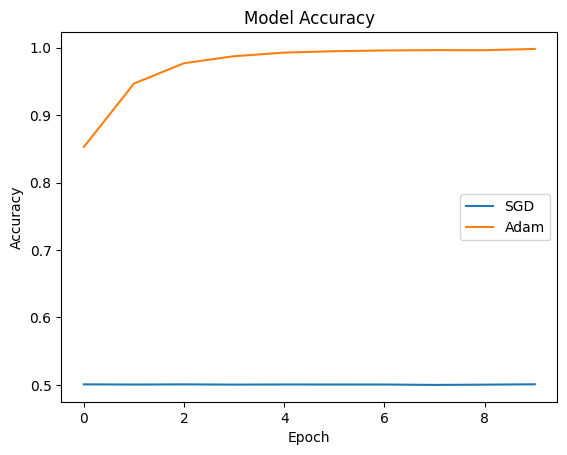

In [26]:
ut.plot(sgd_history, adam_history, key = 'accuracy')

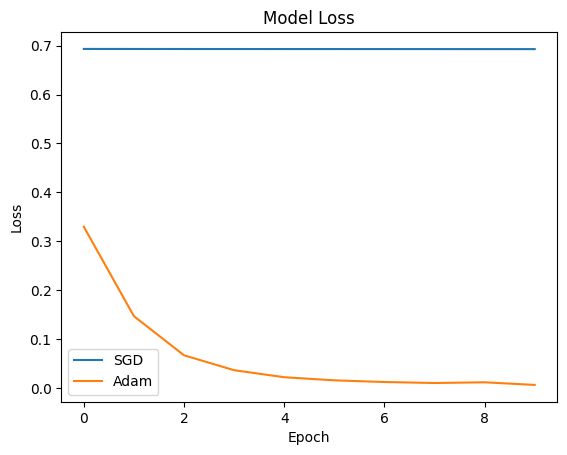

In [27]:
ut.plot(sgd_history, adam_history, key = 'loss')

## Let's collect more data

In [9]:
optimizers = [
    tf.keras.optimizers.SGD,
    tf.keras.optimizers.Adam
]

sgd: batch_size = 32; learning_rate = 0.1
--------------------
loss: 0.7447659969329834, accuracy: 0.6363636255264282
--------------------
adam: batch_size = 32; learning_rate = 0.1
--------------------
loss: 0.6541218161582947, accuracy: 0.6363636255264282
--------------------
sgd: batch_size = 32; learning_rate = 0.01
--------------------
loss: 0.6183356046676636, accuracy: 0.6212121248245239
--------------------
adam: batch_size = 32; learning_rate = 0.01
--------------------
loss: 0.48539450764656067, accuracy: 0.7803030014038086
--------------------
sgd: batch_size = 32; learning_rate = 0.001
--------------------
loss: 0.6949953436851501, accuracy: 0.6212121248245239
--------------------
adam: batch_size = 32; learning_rate = 0.001
--------------------
loss: 0.512978732585907, accuracy: 0.6818181872367859
--------------------
sgd: batch_size = 64; learning_rate = 0.1
--------------------
loss: 0.6282374262809753, accuracy: 0.6363636255264282
--------------------
adam: batch_size =

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('titanic',
  32,
  0.1,
  'sgd',
  2.9197301864624023,
  0.7447659969329834,
  0.6363636255264282),
 ('titanic',
  32,
  0.1,
  'adam',
  3.698296546936035,
  0.6541218161582947,
  0.6363636255264282),
 ('titanic',
  32,
  0.01,
  'sgd',
  4.082017660140991,
  0.6183356046676636,
  0.6212121248245239),
 ('titanic',
  32,
  0.01,
  'adam',
  3.552786350250244,
  0.48539450764656067,
  0.7803030014038086),
 ('titanic',
  32,
  0.001,
  'sgd',
  2.868486166000366,
  0.6949953436851501,
  0.6212121248245239),
 ('titanic',
  32,
  0.001,
  'adam',
  4.802281618118286,
  0.512978732585907,
  0.6818181872367859),
 ('titanic',
  64,
  0.1,
  'sgd',
  3.0223183631896973,
  0.6282374262809753,
  0.6363636255264282),
 ('titanic',
  64,
  0.1,
  'adam',
  2.9599733352661133,
  0.5022996068000793,
  0.7575757503509521),
 ('titanic',
  64,
  0.01,
  'sgd',
  3.344576597213745,
  0.6266050934791565,
  0.6287878751754761),
 ('titanic',
  64,
  0.01,
  'adam',
  3.228588104248047,
  0.492050349712371

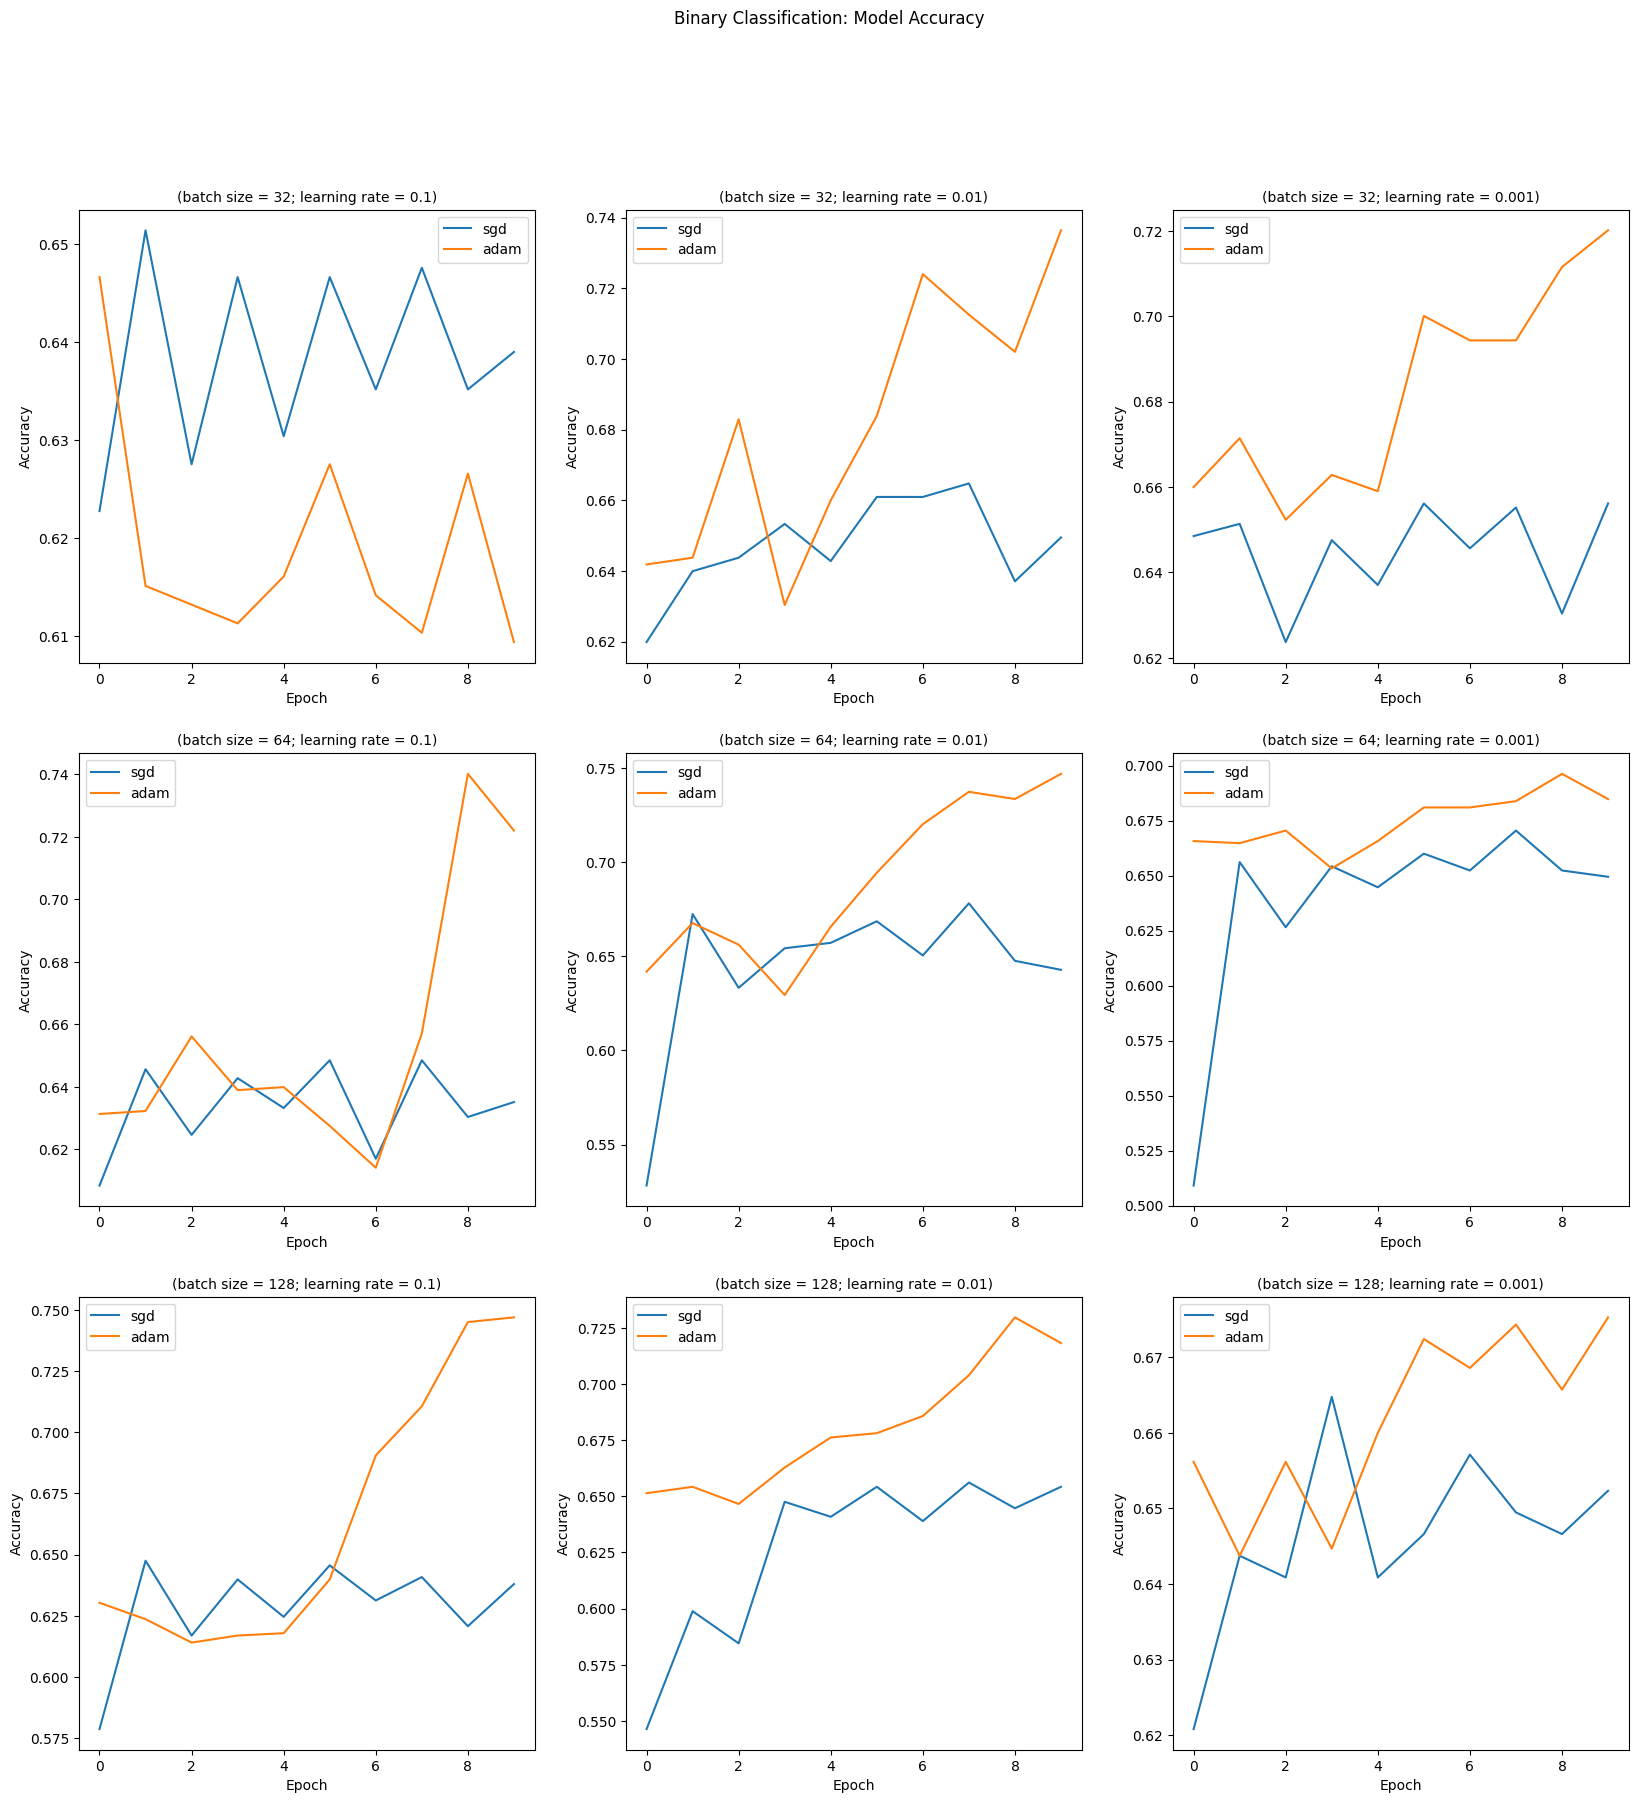

In [29]:
titanic_results = ut.collect_data_titanic(titanic, batch_sizes, learning_rates, optimizers)
titanic_results

sgd: batch_size = 32; learning_rate = 0.1
--------------------
loss: 0.04006205499172211, accuracy: 0.9898571372032166
--------------------
adam: batch_size = 32; learning_rate = 0.1
--------------------
loss: 2.3065757751464844, accuracy: 0.11257142573595047
--------------------
sgd: batch_size = 32; learning_rate = 0.01
--------------------
loss: 0.055188171565532684, accuracy: 0.9832857251167297
--------------------
adam: batch_size = 32; learning_rate = 0.01
--------------------
loss: 0.10439689457416534, accuracy: 0.9762856960296631
--------------------
sgd: batch_size = 32; learning_rate = 0.001
--------------------
loss: 0.18896235525608063, accuracy: 0.9462857246398926
--------------------
adam: batch_size = 32; learning_rate = 0.001
--------------------
loss: 0.04882452264428139, accuracy: 0.9909999966621399
--------------------
sgd: batch_size = 64; learning_rate = 0.1
--------------------
loss: 0.0383705236017704, accuracy: 0.9879999756813049
--------------------
adam: batch

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('mnist',
  32,
  0.1,
  'sgd',
  82.75388240814209,
  0.04006205499172211,
  0.9898571372032166),
 ('mnist',
  32,
  0.1,
  'adam',
  86.01385307312012,
  2.3065757751464844,
  0.11257142573595047),
 ('mnist',
  32,
  0.01,
  'sgd',
  82.12262201309204,
  0.055188171565532684,
  0.9832857251167297),
 ('mnist',
  32,
  0.01,
  'adam',
  89.0264482498169,
  0.10439689457416534,
  0.9762856960296631),
 ('mnist',
  32,
  0.001,
  'sgd',
  82.77946639060974,
  0.18896235525608063,
  0.9462857246398926),
 ('mnist',
  32,
  0.001,
  'adam',
  90.61568450927734,
  0.04882452264428139,
  0.9909999966621399),
 ('mnist',
  64,
  0.1,
  'sgd',
  57.285815954208374,
  0.0383705236017704,
  0.9879999756813049),
 ('mnist',
  64,
  0.1,
  'adam',
  57.437509536743164,
  2.3121554851531982,
  0.09928571432828903),
 ('mnist',
  64,
  0.01,
  'sgd',
  52.11576986312866,
  0.07162433862686157,
  0.9779999852180481),
 ('mnist',
  64,
  0.01,
  'adam',
  53.568132638931274,
  0.0860925018787384,
  0.97985

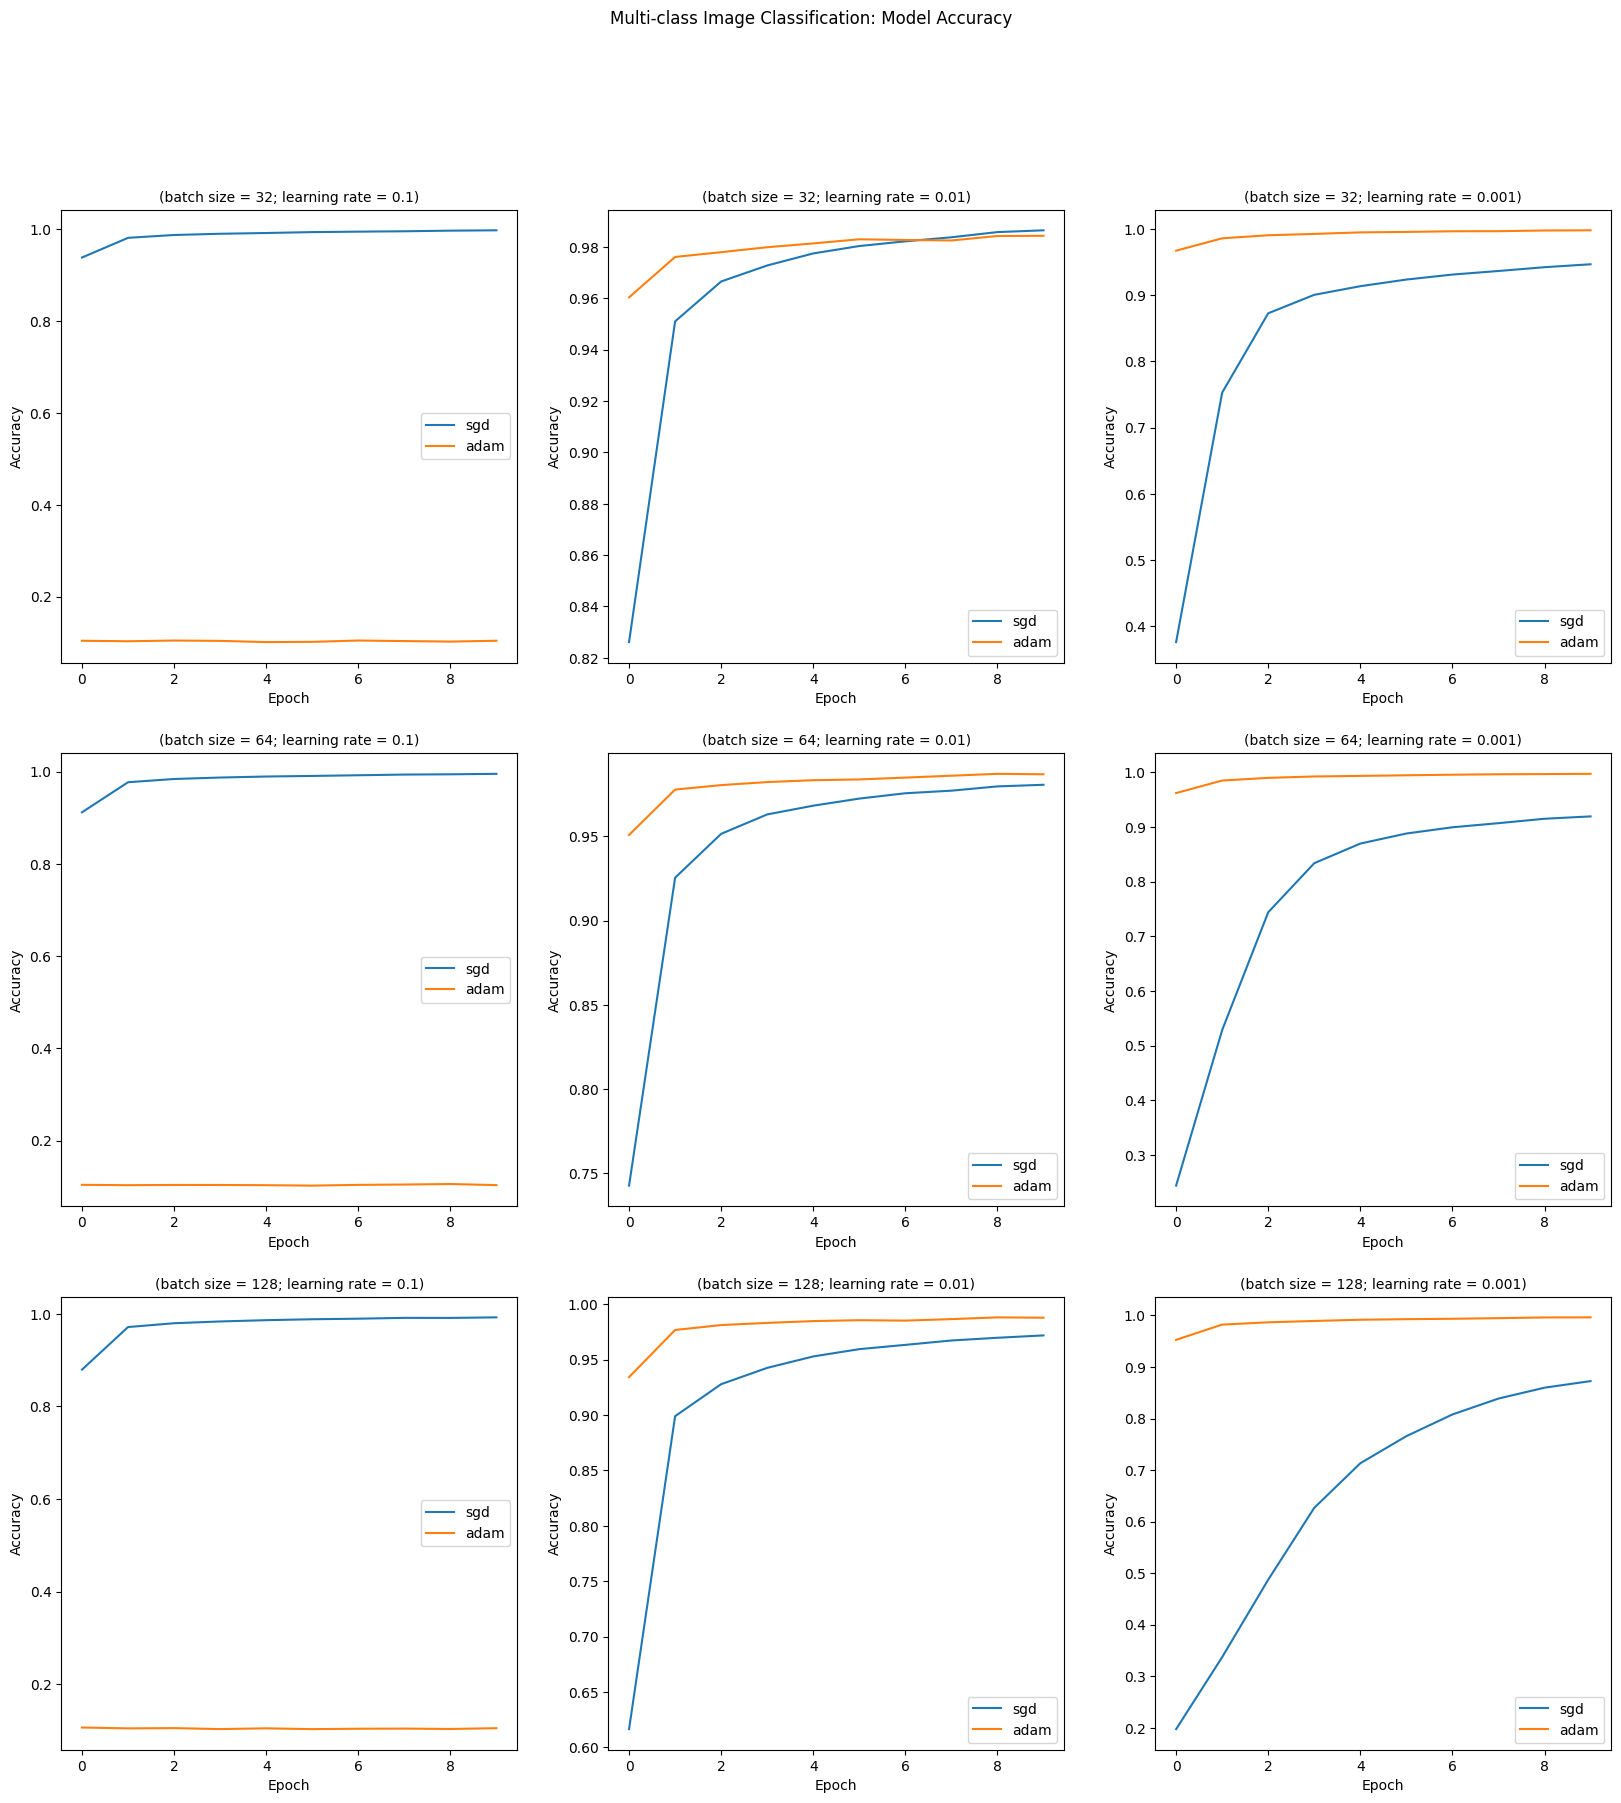

In [30]:
mnist_results = ut.collect_data_mnist(mnist, batch_sizes, learning_rates, optimizers)
mnist_results

In [ ]:
imdb_results = ut.collect_data_imdb(imdb, batch_sizes, learning_rates, optimizers)
imdb_results

sgd: batch_size = 32; learning_rate = 0.1
--------------------
loss: 0.42167720198631287, accuracy: 0.7789999842643738
--------------------
adam: batch_size = 32; learning_rate = 0.1
--------------------
loss: 0.7367627024650574, accuracy: 0.4984000027179718
--------------------
sgd: batch_size = 32; learning_rate = 0.01
--------------------
loss: 0.560792088508606, accuracy: 0.722599983215332
--------------------
adam: batch_size = 32; learning_rate = 0.01
--------------------
loss: 0.4921780824661255, accuracy: 0.8633999824523926
--------------------
sgd: batch_size = 32; learning_rate = 0.001
--------------------
loss: 0.6928278207778931, accuracy: 0.49540001153945923
--------------------
adam: batch_size = 32; learning_rate = 0.001
--------------------
loss: 0.6226915121078491, accuracy: 0.873199999332428
--------------------
sgd: batch_size = 64; learning_rate = 0.1
